In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[10,6]

# PROBLEM STATEMENT

This hackathon will try to address the challenges of banking telecallers when they call blindly to people in order to sell term deposit plans. The aim of this hackathon is to find the most accurate prediction of whether a person to be called will subscribe to the term deposit plan or not using any of the machine learning algorithms. The participants can use the historical data that consists of different features of customers and whether they subscribed to the plan or not. Using this data, the participants need to build a machine learning model in order to make predictions.

In [2]:
train=pd.read_csv('train.csv')
train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0


In [3]:
test=pd.read_csv('test.csv')
test.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,36,technician,divorced,secondary,no,1842,yes,yes,cellular,5,aug,149,1,-1,0,unknown
1,26,management,married,primary,no,165,no,no,cellular,7,nov,44,2,-1,0,unknown
2,50,management,married,unknown,no,5006,yes,no,cellular,7,may,664,2,-1,0,other


In [4]:
train.shape,test.shape

((21000, 17), (9000, 16))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        21000 non-null  int64 
 1   job        21000 non-null  object
 2   marital    21000 non-null  object
 3   education  21000 non-null  object
 4   default    21000 non-null  object
 5   balance    21000 non-null  int64 
 6   housing    21000 non-null  object
 7   loan       21000 non-null  object
 8   contact    21000 non-null  object
 9   day        21000 non-null  int64 
 10  month      21000 non-null  object
 11  duration   21000 non-null  int64 
 12  campaign   21000 non-null  int64 
 13  pdays      21000 non-null  int64 
 14  previous   21000 non-null  int64 
 15  poutcome   21000 non-null  object
 16  y_bool     21000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 2.7+ MB


<AxesSubplot:>

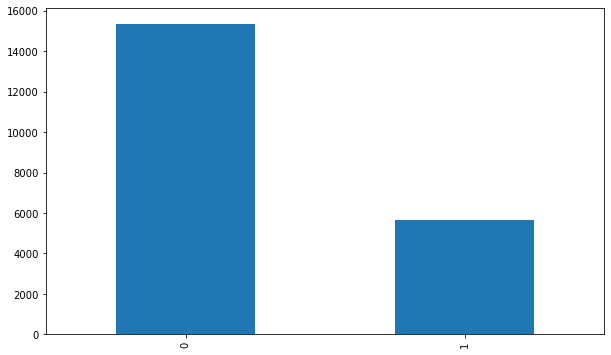

In [17]:
# Target variable:
train.y_bool.value_counts().plot(kind='bar')
# The target variable is imbalanced.

In [9]:
# Combine the data
combined=pd.concat([train,test],ignore_index=True)

In [11]:
combined.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y_bool'],
      dtype='object')

In [10]:
combined.job.unique()

array(['admin.', 'blue-collar', 'services', 'self-employed', 'technician',
       'management', 'unknown', 'unemployed', 'retired', 'housemaid',
       'entrepreneur', 'student'], dtype=object)

In [13]:
# Binning the profession into categories
def prof(x):
    if x in ['unknown', 'unemployed', 'retired','student']:
        return('Unemployed')
    elif x in ['entrepreneur','employed','management','admin.']:
        return('Employed')
    elif x in ['blue-collar','services','technician','housemaid']:
        return('blue_collar')
    else:
        return(x)

In [14]:
combined['profession']=combined.job.apply(prof)

In [15]:
combined.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0,Employed
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0,blue_collar
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0,blue_collar


In [16]:
combined.profession.value_counts()

blue_collar      16165
Employed         10674
Unemployed        2394
self-employed      767
Name: profession, dtype: int64

In [29]:
tbl=pd.crosstab(combined.profession,combined.y_bool)
import scipy.stats as stats
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)
print('P-value',pvalue)

P-value 0.8998156184915612


<AxesSubplot:xlabel='profession'>

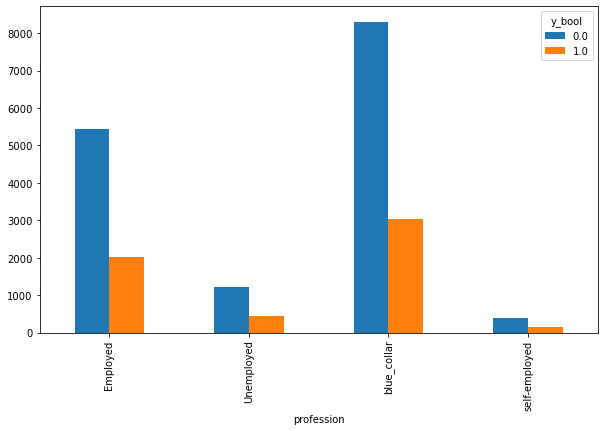

In [30]:
tbl.plot(kind='bar')

In [33]:
cat_cols=combined.select_dtypes(include=[np.object]).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'profession'],
      dtype='object')

In [35]:
for i in cat_cols:
    if len(combined.loc[:,i].unique())<=3:
        print(i)

marital
default
housing
loan
contact


In [36]:
combined.education.unique()

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

In [42]:
combined.loc[combined.education=='unknown','profession'].value_counts()

blue_collar      861
Employed         597
Unemployed       126
self-employed     31
Name: profession, dtype: int64

In [43]:
combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0,Employed
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0,blue_collar
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0,blue_collar
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1.0,Employed
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0.0,blue_collar


In [49]:
combined.poutcome.unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [47]:
pd.DataFrame(combined.groupby('poutcome')['y_bool'].value_counts(normalize=True)).T

poutcome   failure               other             success            \
y_bool         0.0       1.0       0.0       1.0       0.0       1.0   
y_bool    0.742012  0.257988  0.732836  0.267164  0.689922  0.310078   

poutcome   unknown            
y_bool         0.0       1.0  
y_bool    0.729178  0.270822

In [54]:
# Apply chi-square test to verify the important catetgorical variable
feats=[]
for i in cat_cols:
    tbl=pd.crosstab(combined.loc[:,i],combined.y_bool)
    teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)
    if pvalue<0.05:
        feats.append(i)
print(feats)

['job']


Therefore job is the important feature that affects the target variable.

In [58]:
# List of numeric variables
num_cols=combined.select_dtypes(include=[np.number]).columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y_bool'],
      dtype='object')

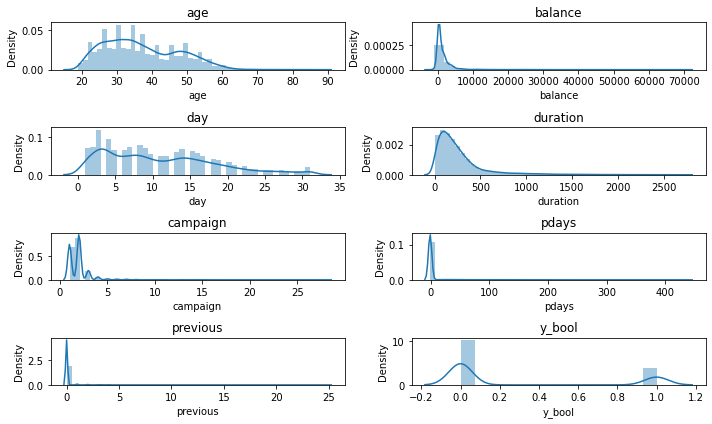

In [61]:
nrows=4
ncols=2
iterator=1
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(combined.loc[:,i])
    plt.title(i)
    iterator=iterator+1
plt.tight_layout()
plt.show()

Since the data seems to be skewed we will use log transformation on the numerical variables only.

In [63]:
from sklearn.preprocessing import KBinsDiscretizer
kbins=KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='uniform')
combined['Age_bins']=kbins.fit_transform(combined[['age']])

In [65]:
tbl=pd.crosstab(combined.Age_bins,combined.y_bool)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)
print(pvalue)

7.913095873130406e-10


Now, the Age column after binning has a significant effect on the target variable (y_bool)

In [64]:
combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,Age_bins
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0,Employed,1.0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0,blue_collar,2.0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0.0,blue_collar,2.0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1.0,Employed,0.0
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0.0,blue_collar,1.0


In [69]:
kbins.bin_edges_

array([array([19., 36., 53., 70., 87.])], dtype=object)

In [68]:
combined.Age_bins.dtypes

dtype('float64')

In [70]:
def bins(x):
    if(x<=19):
        return('Teens')
    elif(x<=36):
        return('Adults')
    elif(x<=53):
        return('Mature')
    else:
        return('Senior')  

In [71]:
# Apply
combined['age_cat']=combined.age.apply(bins)

In [72]:
tbl=pd.crosstab(combined.age_cat,combined.y_bool)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)
print(pvalue)

3.1639967525897536e-11


Now, the Age column after binning manually has a significant effect on the target variable (y_bool)


In [74]:
combined.balance.describe()

count    30000.000000
mean      1608.013900
std       2989.866596
min      -2477.000000
25%        303.000000
50%        634.000000
75%       1880.000000
max      71188.000000
Name: balance, dtype: float64

In [76]:
# Convert negative bank balance to zero.
def balanced(x):
    if x<0:
        return(0)
    else:
        return(x)

In [77]:
combined.balance=combined.balance.apply(balanced)
combined.balance.describe()

count    30000.000000
mean      1626.014067
std       2978.325577
min          0.000000
25%        303.000000
50%        634.000000
75%       1880.000000
max      71188.000000
Name: balance, dtype: float64

In [79]:
# Lets make number of bins as 5
kbins=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
combined['balance_bins']=kbins.fit_transform(combined[['balance']])
kbins.bin_edges_

array([array([    0. ,   236. ,   492. ,  1078.4,  2199. , 71188. ])],
      dtype=object)

In [84]:
combined.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,Age_bins,age_cat,balance_bins
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0.0,Employed,1.0,Mature,0.0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0.0,blue_collar,2.0,Senior,4.0


In [85]:
tbl=pd.crosstab(combined.balance_bins,combined.y_bool)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)
print(pvalue)

0.0008745599667551404


Now, the balance column after binning manually has a significant effect on the target variable (y_bool)

In [83]:
pd.set_option('display.max_columns',500)

In [87]:
# Duration column
combined['duration']=combined.duration/60
combined.duration.describe()

count    30000.000000
mean         4.379814
std          4.764683
min          0.066667
25%          1.566667
50%          3.050000
75%          5.300000
max         45.050000
Name: duration, dtype: float64

In [89]:
# Lets make number of bins as 5
kbins=KBinsDiscretizer(n_bins=4,encode='onehot',strategy='uniform')
kbins.fit_transform(combined[['duration']])
kbins.bin_edges_

array([array([ 0.06666667, 11.3125    , 22.55833333, 33.80416667, 45.05      ])],
      dtype=object)

In [91]:
# Drop the variables
newdata=combined.drop(['contact','job'],axis=1)

In [94]:
newdata.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,Age_bins,age_cat,balance_bins
0,51,married,tertiary,no,148,no,no,15,apr,4.383333,2,-1,0,unknown,0.0,Employed,1.0,Mature,0.0
1,55,married,secondary,no,7160,yes,no,4,may,5.250000,1,-1,0,unknown,0.0,blue_collar,2.0,Senior,4.0
2,65,divorced,tertiary,no,2197,yes,no,12,may,1.700000,2,-1,0,unknown,0.0,blue_collar,2.0,Senior,3.0
3,25,married,secondary,no,6658,yes,no,16,feb,3.283333,1,-1,0,unknown,1.0,Employed,0.0,Adults,4.0
4,36,married,secondary,no,1761,yes,no,19,sep,2.950000,1,-1,0,success,0.0,blue_collar,1.0,Adults,3.0


<AxesSubplot:xlabel='y_bool,month'>

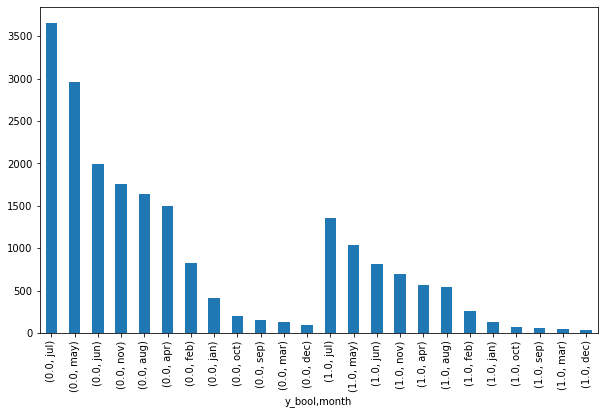

In [101]:
# Month vs Target
newdata.groupby('y_bool')['month'].value_counts().plot(kind='bar')

In [108]:
def months(x):
    if x in ['oct','nov','dec']:
        return('q4')
    elif x in ['apr','may','jun']:
        return('q2')
    elif x in ['jan','feb','mar']:
        return('q1')
    else:
        return('q3')

In [109]:
newdata['month_cat']=newdata.month.apply(months)

In [110]:
newdata.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y_bool,profession,Age_bins,age_cat,balance_bins,month_cat
0,51,married,tertiary,no,148,no,no,15,apr,4.383333,2,-1,0,unknown,0.0,Employed,1.0,Mature,0.0,q2
1,55,married,secondary,no,7160,yes,no,4,may,5.250000,1,-1,0,unknown,0.0,blue_collar,2.0,Senior,4.0,q2
2,65,divorced,tertiary,no,2197,yes,no,12,may,1.700000,2,-1,0,unknown,0.0,blue_collar,2.0,Senior,3.0,q2
3,25,married,secondary,no,6658,yes,no,16,feb,3.283333,1,-1,0,unknown,1.0,Employed,0.0,Adults,4.0,q1
4,36,married,secondary,no,1761,yes,no,19,sep,2.950000,1,-1,0,success,0.0,blue_collar,1.0,Adults,3.0,q3


In [111]:
tbl=pd.crosstab(newdata.month_cat,newdata.y_bool)
teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)
print(pvalue)

0.04597093223395938


Therefore month variable after binning it into quarters is having a significant effect on the target variable

In [112]:
newdata.shape

(30000, 20)

In [113]:
# Dropping age and month
newdata=newdata.drop(['day','month'],axis=1)

In [116]:
# Split the data into train and test
newtrain=newdata.loc[0:train.shape[0]-1,:]
newtest=newdata.loc[train.shape[0]:,:]
newtest=newtest.drop('y_bool',axis=1)

In [124]:
newtrain.head(2)

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y_bool,profession,Age_bins,age_cat,balance_bins,month_cat
0,51,married,tertiary,no,148,no,no,4.383333,2,-1,0,unknown,0,Employed,1.0,Mature,0.0,q2
1,55,married,secondary,no,7160,yes,no,5.250000,1,-1,0,unknown,0,blue_collar,2.0,Senior,4.0,q2


In [125]:
# Convert target into integer
newtrain["Age_bins"] = newtrain.Age_bins.astype(int)
newtrain["balance_bins"] = newtrain.balance_bins.astype(int)
newtrain["y_bool"] = newtrain.y_bool.astype(int)

In [132]:
newtest["Age_bins"] = newtest.Age_bins.astype(int)
newtest["balance_bins"] = newtest.balance_bins.astype(int)

In [120]:
newtrain.shape,newtest.shape,train.shape,test.shape

((21000, 18), (9000, 17), (21000, 17), (9000, 16))

# Modelling

In [133]:
dummytrain=pd.get_dummies(newtrain,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)

In [134]:
X=dummytrain.drop('y_bool',axis=1)
y=dummytrain.y_bool

SMOTE analysis is done because our target variable is imbalanced

In [141]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote_x,smote_y=smote.fit_resample(X,y)

# Logistic Regression Model

In [147]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred=[]
for train_index,test_index in kfold.split(smote_x,smote_y):
    xtrain=smote_x.loc[train_index]
    ytrain=smote_y.loc[train_index]
    pred.append(lg.fit(xtrain,ytrain).predict(dummytest))
finalpred=np.abs(pd.DataFrame(pred).T.mode(axis=1)[0])
# Submission file:
submission=pd.DataFrame({'y_bool':finalpred})
submission.to_csv('Logistic_smote_mode.csv',index=False)
# RMSE score: 8.91995

# Random Forest Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=10)
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=10)
pred=[]
for train_index,test_index in kfold.split(smote_x,smote_y):
    xtrain=smote_x.loc[train_index]
    ytrain=smote_y.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))
finalpred=np.abs(pd.DataFrame(pred).T.mode(axis=1)[0])
#Submission file:
submission=pd.DataFrame({'y_bool':finalpred})
submission.to_csv('RFmodel_mode.csv',index=False)
# RMSE score: 10.25936

<AxesSubplot:>

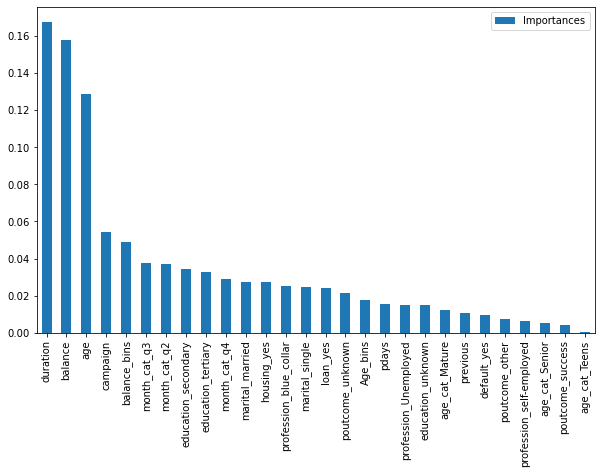

In [155]:
pd.DataFrame({'Importances':rf.feature_importances_},index=smote_x.columns).sort_values(by='Importances',ascending=False).plot(kind='bar')

In [174]:
from mlxtend.feature_selection import SequentialFeatureSelector
sfs=SequentialFeatureSelector(estimator=dtree,k_features='best',forward=True)
sfs.fit(smote_x,smote_y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          k_features=(1, 28), scoring='accuracy')

In [175]:
sfs.k_feature_names_

('duration', 'age_cat_Teens')

# Decision Tree Classifier

In [158]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(dtree.fit(xtrain,ytrain).predict(dummytest))
finalpred=np.abs(pd.DataFrame(pred).T.mode(axis=1)[0])
# Submission file:
submission=pd.DataFrame({'y_bool':finalpred})
submission.to_csv('Dtree_withoutsmote.csv',index=False)
# RMSE score:10.25936

# Light GBM Classifier

In [167]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=0)
pred=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(lgbm.fit(xtrain,ytrain).predict(dummytest))
finalpred=np.abs(pd.DataFrame(pred).T.mode(axis=1)[0])
submission=pd.DataFrame({'y_bool':finalpred})
submission.to_csv('LGBM.csv',index=False)
# RMSE score: 8.77541

So selecting Light GBM classifier as our final model as it is giving the low RMSE value.